In [2]:
import numpy as np
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
import mglearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open("./data_rand","rb") as f:
    l = pickle.load(f)

In [4]:
data = pd.DataFrame(data=l)
data.rename(columns={0:"X-axis",1:"Y-axis",2:"Out"},inplace=True)
data.head()

,X-axis,Y-axis,Out
0,0.000000,0.000000,False
1,-4.851479,1.209609,False
2,-14.554436,3.628828,False
3,-29.108872,7.257657,False
4,-48.514786,12.096095,True


In [5]:
data_x = data[["X-axis","Y-axis"]]
data_y = data["Out"]
data_y = data_y.replace(to_replace=[True,False],value=[1,0])
x_train, x_test,y_train,y_test = train_test_split(data_x,data_y,random_state=42,train_size=0.7,test_size=0.3)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.920


In [6]:
export_graphviz(tree, out_file="tree.dot", class_names=["Out","In"],
feature_names=data_x.columns, impurity=False, filled=True)

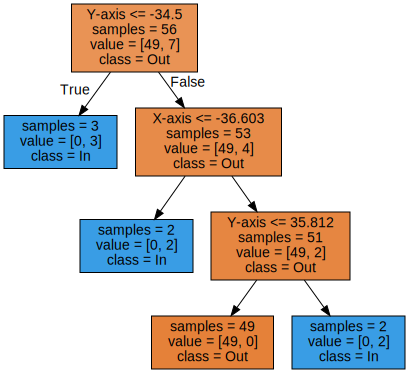

In [7]:

with open("./tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.29004809 0.70995191]


Feature importances: [0. 1.]


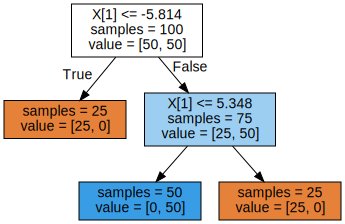

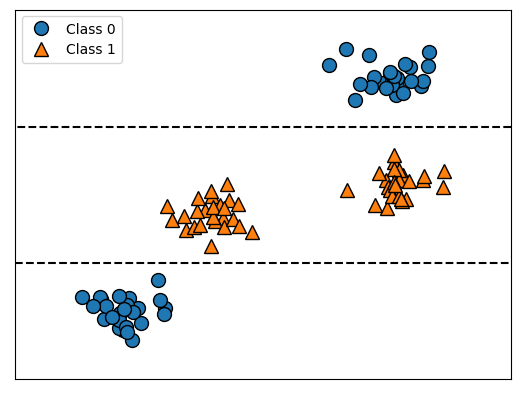

In [9]:
tree_img = mglearn.plots.plot_tree_not_monotone()
display(tree_img)

In [10]:
print(tree.predict([[-36.025663846743356,-36.025663846743356]]))

[1]


In [11]:
def find_edges(X, Y):
    X.sort()
    Y.sort()
    diagonals = [i for i in set(X).intersection(set(Y))]
    diagonals.sort()
#     print(diagonals)
    L = []
    for d in diagonals:
#         print(d)
        L.append(list(tree.predict([[d,d]]))[0])
    print(L)
    low = L.index(0)
    min_x = X[low]
    min_y = Y[low]
    high = L[::-1].index(0)
    max_x = X[len(X)-1 - high]
    max_y = Y[len(Y)-1 - high]
    return (min_x, min_y), (max_x, max_y)

In [12]:
print(find_edges([x[0] for x in l], [x[0] for x in l]))

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
((-33.88402683545096, -33.88402683545096), (31.237274093260716, 31.237274093260716))
